In [131]:
%pip install --upgrade numpy matplotlib scipy pingouin hvplot holoviews seaborn

In [114]:
%matplotlib inline

# T-Tests with Pingouin

**Scipy.Stats** has all the stats functions you know and love from stats class!

[**Pingouin**](https://pingouin-stats.org/index.html) does, too!  Pingouin is a new statistics package in Python that wraps pandas and scipy-stats, creating more-complete statistics reports and presenting the results in a more readable way.





### T-Tests

T-tests compare the means of two samples of data generated from a normally-distributed population and compute the probability that they have the same mean. Both packages have functions for t-tests! 


| Test, | `pengouin` Function | `scipy.stats` Function, | 
| :--- | :--- | :--- |
| One-Sampled T-Test | `pg.ttest(x, 0)` | `stats.ttest_1samp(x, 0)`  |
| Independent T-Test | `pg.ttest(x, y)` | `stats.ttest_ind(x, y)` | 
| Paired T-test | `pg.ttest(x, y, paired=True)` | `stats.ttest_rel(x, y)` | 
| Pairwise T-tests | `pg.pairwise_ttests(padjust='fdr_bh')`  |  |


In [115]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns

**Exercises** let's do some analysis on some fake data to get a feel for these two statistics tools.

Generate the Data: Run the code below to create the dataset `df`.

In [25]:
randomizer = np.random.RandomState(17)  # Makes sure the pseudorandom number generators reproduce the same data for us all.
df = pd.DataFrame()
df['A'] = randomizer.normal(0, 1, size=20)
df['B'] = randomizer.normal(0.2, 1, size=20)
df['C'] = randomizer.normal(0.7, 1, size=20)
df['D'] = df.A * 0.3 + randomizer.normal(0, 0.3, size=20)

pd.options.plotting.backend = 'hvplot'
df.plot.box()

:BoxWhisker   [Variable]   (value)

### Analyze the Data with T-Tests in Pingouin

**A vs 0, One-Sampled T-Test (Example)**: Is the mean of the normally-distributed population that the the dataset A is generated from unlikely to be zero?

In [22]:
pg.ttest(df['A'], 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.378652,19,two-sided,0.709144,"[-0.45, 0.65]",0.084669,0.248,0.064966


**B vs 1, One-Sampled T-Test**: Is the mean of the normally-distributed population that the the dataset B is generated from unlikely to be one?

In [24]:
pg.ttest(df['B'], 1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.449603,19,two-sided,0.000275,"[-0.26, 0.55]",0.994961,113.454,0.98794


**A vs B, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `B` is generated from?

In [26]:
pg.ttest(df.A, df.B)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.137189,38,two-sided,0.891606,"[-0.7, 0.61]",0.043383,0.311,0.052052


**A vs C, Independent Samples T-Test**: Is the mean of the normally-distributed population that the the dataset `A` is generated from unlikely to be the same as the mean of the normally-distributed population that the the dataset `C` is generated from?

In [27]:
pg.ttest(df.A, df.C)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.978874,38,two-sided,0.055111,"[-1.42, 0.02]",0.625775,1.409,0.487608


**A vs C, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `C`  unlikely to be 0?

In [28]:
pg.ttest(df.A, df.C, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.728432,19,two-sided,0.100128,"[-1.55, 0.15]",0.625775,0.818,0.756449


**A vs D, Paired Samples T-Test**: Is the mean of the differences between each pair of samples in generated from the two normally-distributed populations `A` and `D`  unlikely to be 0?

In [14]:
pg.ttest(df.A, df.D, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.527742,19,two-sided,0.603788,"[-0.52, 0.31]",0.128979,0.263,0.085076


## Working with Long DataFrames

If data is oranized as a long dataframe, it is also possible to have `pingouin` simply do all the comparisons between the groups. 

| Test, | Function | 
| :--- | :--- |
| Melt | `pd.melt()` |
| ANOVA | `pg.anova(data=dfl, dv='value', between=['variable'], detailed=True, )` |
| ANCOVA | `pg.ancova(dfl, dv='value', between=['variable'], covar=['index'], )` |
| Pairwise T-tests | `pg.pairwise_tests(data=dfl, dv='value', between='variable', subject='index', padjust='fdr')`  |  

**Exercises**

Melt the `data` dataframe using the `ignore_index=False` option and reset the index to create a long dataframe with two columns: "variable", and "value".

In [116]:
dfl = df.melt(ignore_index=False).reset_index()
dfl.sample(5)

,index,variable,value
7,7,A,-0.362101
31,11,B,0.061415
18,18,A,-1.092230
38,18,B,-0.965373
10,10,A,2.171257


Before doing pairwise tests, it's often helpful to run an ANOVA analysis, which can tell you quickly whether a pairwise difference exists.  Below, run an ANOVA test comparing the dv 'value' between values of 'variable' to see if a significant difference is expected.

In [79]:
pg.anova(dfl, dv='value', between=['variable'], detailed=True, )

,Source,SS,DF,MS,F,p-unc,np2
0,variable,7.259916,3,2.419972,2.851046,0.042862,0.101157
1,Within,64.508906,76,0.848801,NaN,NaN,NaN


Do a pairwise test on the long dataframe, comparing the value of 'value' between each value 'variable'. 

In [52]:
pg.pairwise_tests(data=dfl, dv='value', between='variable')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,variable,A,B,False,True,-0.137189,38.0,two-sided,0.891606,0.311,-0.042521
1,variable,A,C,False,True,-1.978874,38.0,two-sided,0.055111,1.409,-0.613342
2,variable,A,D,False,True,0.068052,38.0,two-sided,0.946101,0.309,0.021092
3,variable,B,C,False,True,-2.139828,38.0,two-sided,0.038851,1.806,-0.663229
4,variable,B,D,False,True,0.302159,38.0,two-sided,0.764179,0.32,0.093653
5,variable,C,D,False,True,2.845162,38.0,two-sided,0.007113,6.461,0.881844


Do a pairwise test again on the long dataframe, comparing the value of 'value' between each value 'variable'.  This time, adjust the p-value to compensate for multiple comparisons using the 'fdr' method.  Are the significant differences still significant?  How do the corrected p-values compare to the results of the ANOVA test before?

In [54]:
pg.pairwise_tests(data=dfl, dv='value', between='variable', padjust='fdr')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,variable,A,B,False,True,-0.137189,38.0,two-sided,0.891606,0.946101,fdr,0.311,-0.042521
1,variable,A,C,False,True,-1.978874,38.0,two-sided,0.055111,0.110222,fdr,1.409,-0.613342
2,variable,A,D,False,True,0.068052,38.0,two-sided,0.946101,0.946101,fdr,0.309,0.021092
3,variable,B,C,False,True,-2.139828,38.0,two-sided,0.038851,0.110222,fdr,1.806,-0.663229
4,variable,B,D,False,True,0.302159,38.0,two-sided,0.764179,0.946101,fdr,0.32,0.093653
5,variable,C,D,False,True,2.845162,38.0,two-sided,0.007113,0.042681,fdr,6.461,0.881844


Do a pairwise test again on the long dataframe, comparing the value of 'value' between each value 'variable'.  This time, use a non-parametric comparison (not assuming a normal distribution of each variable), and still adjust for multiple comparisons.  Are your results the same?

In [55]:
pg.pairwise_tests(data=dfl, dv='value', between='variable', padjust='fdr', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,variable,A,B,False,False,192.0,two-sided,0.839232,0.967635,fdr,-0.042521
1,variable,A,C,False,False,136.0,two-sided,0.085855,0.171710,fdr,-0.613342
2,variable,A,D,False,False,202.0,two-sided,0.967635,0.967635,fdr,0.021092
3,variable,B,C,False,False,132.0,two-sided,0.067868,0.171710,fdr,-0.663229
4,variable,B,D,False,False,232.0,two-sided,0.394171,0.591256,fdr,0.093653
5,variable,C,D,False,False,273.0,two-sided,0.049864,0.171710,fdr,0.881844


## Further Reading

Nice article on Pingouin here: https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c

Nice summary of the different effect size metrics and when to pick which: https://www.socscistatistics.com/effectsize/default3.aspx

## Extra: Correlations and Simpson's Paradox

| Function | Description |
| :-- | :-- |
| `pg.corr(A, B)` | The correlation between variables A and B |
| `pg.pairwise_corr(flowers)` | Pairwise correlations |
| `df.plot.scatter(x='A', y='B')` | Make a scatter plot |
| `sns.lmplot(data=df, x='Col1', y='Col2', hue='Col3')` | Make a scatter plot with a regression line |

Download the iris dataset for this section:

In [110]:
from bokeh import sampledata
# sampledata.download()

In [111]:
from bokeh.sampledata import iris
flowers = iris.flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Exercises**:

Is there a correlation between flowers' sepal widths and their petal lengths?

In [112]:
pg.corr(flowers['sepal_width'], flowers['petal_length'])

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.42844,"[-0.55, -0.29]",4.513314e-08,2.762e+05,0.999847


Use seaborn's `lmplot()` function to plot a regression line showing the sepal widths and petal lengths.  Does the direction of this line match the results?  Looking closely at the data's distribution, what is missing from this story?

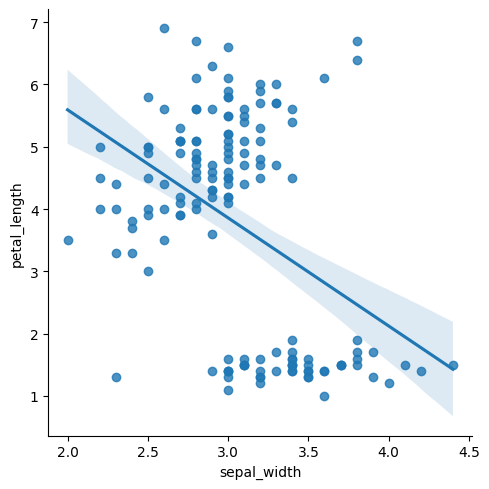

In [129]:
sns.lmplot(data=flowers, x='sepal_width', y='petal_length');

This time factor in the `species` variable into the `lmplot()` visualization.  What kind of relationship do you see between `sepal_width` and `petal_length` now?

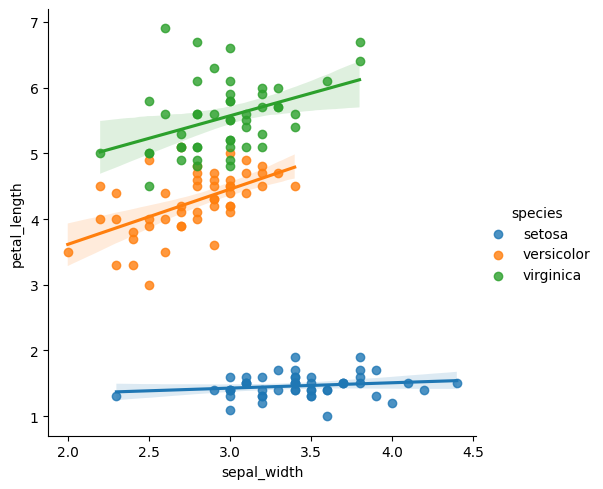

In [130]:
sns.lmplot(data=flowers, x='sepal_width', y='petal_length', hue='species');

What's happening here is that a third variable, `"species"`, is influencing both the petal and the sepal shape; this effect is called "Simpson's Paradox".   Unfortunately, at this time (as far as I know) pengouin doesn't have a way to split a correlation into multiple groups; one way to do this, though, is to use a `df.groupby()` analysis, concatenating the results together:

In [128]:
analyses = []
for name, group in flowers.groupby('species'):
    analysis = pg.corr(group['sepal_width'], group['petal_length'])
    analysis['name'] = name
    analyses.append(analysis)
results = pd.concat(analyses)
results

,n,r,CI95%,p-val,BF10,power,name
pearson,50,0.177700,"[-0.11, 0.43]",0.216979,0.37,0.236771,setosa
pearson,50,0.560522,"[0.33, 0.73]",0.000023,1061.04,0.992245,versicolor
pearson,50,0.401045,"[0.14, 0.61]",0.003898,10.094,0.836041,virginica


To summarize, accounting for the right variables is a big part of science; we should always be aware that the patterns we see in our data can be turned completely upside down when new aspects of a problem are understood and factored in!  